In [1]:
from os import *
from astropy.visualization import *
from astropy.io import fits
from astropy.stats import *
from matplotlib import pyplot as plt 
from astrofyp_functions import *
import glob

In [6]:
# --- Plot Parameters ---- 

plt.rcParams["figure.dpi"] = 100
# plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

# Fits Calibration 

This code generates the flats and bias images for image reduction.


In [3]:
# vignetting_framing = [x1:x2, y1:y2] # - Framing to cut all parts of the image that are subjected to vignetting

x1 = 600; x2 = 1400 
y1 = 500; y2 = 1350

framing = [x1, x2, y1, y2]

print(x2 - x1);  print(y2 - y1)

print(int((x2 - x1)/100));  print(int((y2 - y1)/100))

plt.rcParams["figure.figsize"] = ((int(x2-x1)/100),(int(y2-y1)/100))

800
850
8
8


## Bias Frame 

Calar Alto bias frame acquired on the night of the 9/03/22 

In [4]:
bias_filelist = sorted(glob.glob('obs_data/bias/*.fits')); print(bias_filelist)
master_bias = SigmaCombine(bias_filelist, 4, 10, *framing)

['obs_data/bias/UCD_0092.fits', 'obs_data/bias/UCD_0093.fits', 'obs_data/bias/UCD_0094.fits', 'obs_data/bias/UCD_0095.fits', 'obs_data/bias/UCD_0096.fits', 'obs_data/bias/UCD_0097.fits', 'obs_data/bias/UCD_0098.fits', 'obs_data/bias/UCD_0099.fits', 'obs_data/bias/UCD_0100.fits', 'obs_data/bias/UCD_0101.fits', 'obs_data/bias/UCD_0102.fits', 'obs_data/bias/UCD_0103.fits', 'obs_data/bias/UCD_0104.fits', 'obs_data/bias/UCD_0105.fits', 'obs_data/bias/UCD_0106.fits', 'obs_data/bias/UCD_0107.fits', 'obs_data/bias/UCD_0108.fits', 'obs_data/bias/UCD_0109.fits', 'obs_data/bias/UCD_0110.fits', 'obs_data/bias/UCD_0111.fits', 'obs_data/bias/UCD_0112.fits', 'obs_data/bias/UCD_0113.fits', 'obs_data/bias/UCD_0114.fits', 'obs_data/bias/UCD_0115.fits', 'obs_data/bias/UCD_0116.fits', 'obs_data/bias/UCD_0117.fits', 'obs_data/bias/UCD_0118.fits', 'obs_data/bias/UCD_0119.fits', 'obs_data/bias/UCD_0120.fits', 'obs_data/bias/UCD_0121.fits', 'obs_data/bias/UCD_0122.fits', 'obs_data/bias/UCD_0123.fits', 'obs_da

Mean Count: 726.8282121090386 
 Standard Deviation: 0.32260676199795907


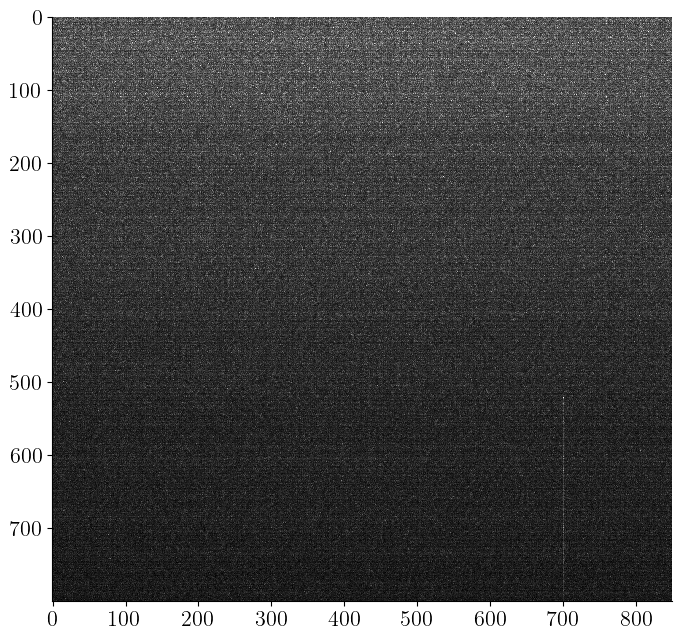

In [9]:
print('Mean Count:', master_bias.mean(), '\n Standard Deviation:', master_bias.std())

master_bias_file = fits.PrimaryHDU(master_bias)
master_bias_file.writeto('processed_data/master_bias.fits', overwrite=True)

norm = ImageNormalize(master_bias, interval=ZScaleInterval(), stretch= SinhStretch())
plt.imshow(master_bias, cmap=plt.cm.gray, norm=norm, interpolation='none')
plt.tick_params(labelsize=16)
plt.show()

## Flats B 

In [16]:
flats_filenameB = sorted(glob.glob('obs_data/FlatB/*.fits'))
bflat_B_master = SigmaCombine(flats_filenameB, 4, 10, *framing)

31.711094608930487


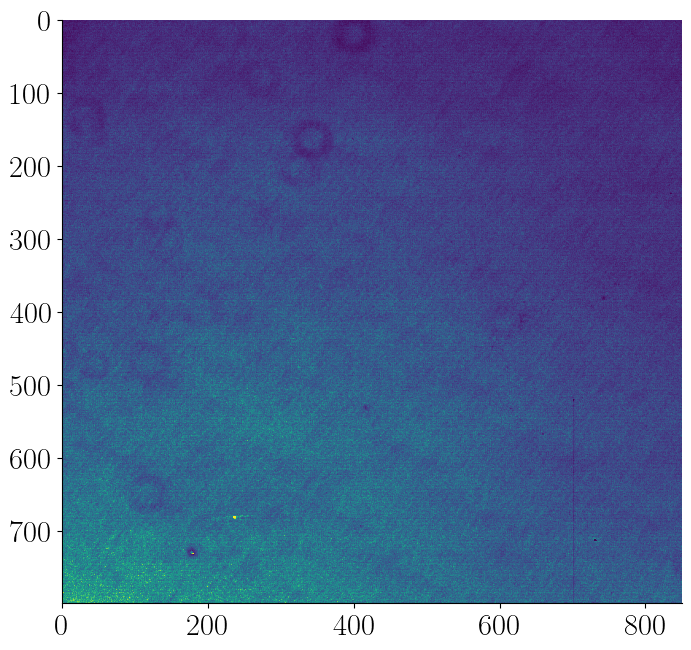

1.000005301736319


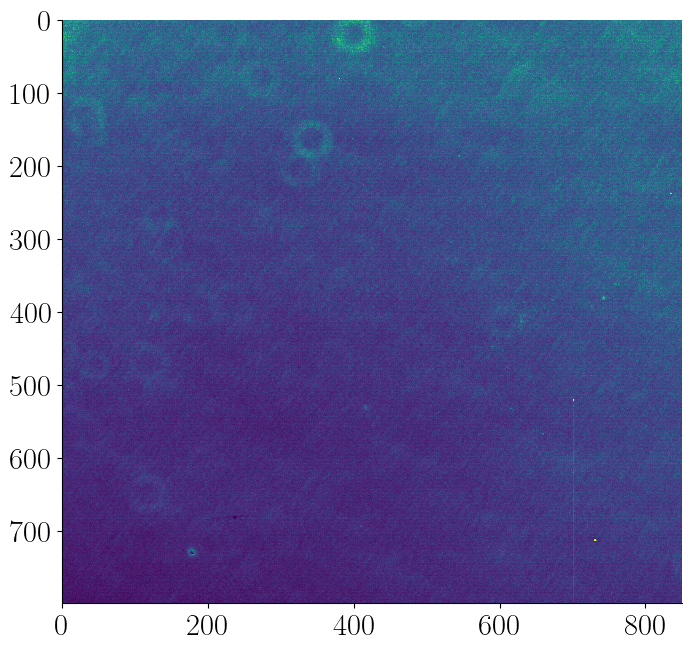

In [15]:
print(bflat_B_master.mean())
bflat_B_master = bflat_B_master - master_bias
norm = ImageNormalize(bflat_B_master, interval=ZScaleInterval(), stretch= SinhStretch())
plt.imshow(bflat_B_master, norm = norm)
plt.show()

bflat_Bfile_header = fits.PrimaryHDU(bflat_B_master)
bflat_Bfile_header.writeto('processed_data/bFlat_Bmaster.fits', overwrite=True)

norm_bflat_B_master = bflat_B_master/np.median(bflat_B_master)
print(norm_bflat_B_master.mean())
norm = ImageNormalize(norm_bflat_B_master, interval=ZScaleInterval(), stretch= SinhStretch())
plt.imshow(norm_bflat_B_master, norm = norm)

norm_bflat_Bfile_header = fits.PrimaryHDU(norm_bflat_B_master)
norm_bflat_Bfile_header.writeto('processed_data/normbFlat_Bmaster.fits', overwrite=True)

## Flats V

In [17]:
flats_filenameV = sorted(glob.glob('obs_data/FlatV/*.fits'))
bflat_V_master = SigmaCombine(flats_filenameV, 4, 10, *framing)